# A New View of the Global Water Cycle

#### Integrating NASA's state-of-the art model and remote sensing observations to reveal human impacts on water cycle





This notebook demonstrate an example of ultilizing the global water cycle reanalysis product to explore the human impacts on water cycle.

## Introduction

Freshwater is what makes Earth habitable, sustaining ecosystems and human civilization. The global water cycle supplies water and regulates weather patterns. The cycling of water links the changes on land with the ocean and atmosphere. Understanding the variability and availability of freshwater is challenging because of multiple earth processes that continually interact with each other, including those that govern precipitation, ground soil moisture retention, snow accumulation and melt, evapotranspiration and vegetation dynamics. Such processes become even more complex under human water resources management.

The EIS team integrates the Noah-MP land surface model within [NASA’s LIS framework](https://lis.gsfc.nasa.gov) and Earth observations by assimilating soil moisture from the Climate Change Initiative Program released by European Space Agency ([ESA CCI](https://esa-soilmoisture-cci.org)), leaf area index from Moderate Resolution Imaging Spectroradiometer ([MODIS](https://lpdaac.usgs.gov/products/mcd15a2hv006/)), and terrestrial water storage anomalies from Gravity Recovery and Climate Experiment and the follow-on satellites ([GRACE/GRACE-FO](https://earth.gsfc.nasa.gov/geo/data/grace-mascons)). Using this data assimilation approach, the team provides a daily global water cycle reanalysis product for 2003-2021 at a 10 km spatial resolution. This allows us to better quantify surface variables and groundwater, human management influence, and hydrological extremes. These resulting reanalysis datasets are publicly available and interactable via this NASA VEDA platform, including key water, energy, and carbon fluxes such as terrestrial water storage (TWS) and gross primary production (GPP). For more information, please visit the corresponding [VEDA dataset page](https://www.earthdata.nasa.gov/dashboard/eis/datasets?_gl=1*wvnzyt*_ga*NzQyNjE1NTcwLjE2NzgxMzQxMDg.*_ga_CQ3WLED121*MTY3ODcyMjk1OS43LjEuMTY3ODcyMzY1Mi4wLjAuMA..).

## Agricultural irrigation led to freshwater depletion

Over the globe, terrestrial water storage in many places is decreasing, driven by the independent or combined impacts of natural variability, human groundwater pumping, and climate change. The vast agricultural regions such as the North China Plain and Northwestern India rely heavily on groundwater pumping for irrigation. By integrating GRACE/GRACE-FO terrestrial water storage anomaly data into the global reanalysis, we are able to identify these “hotspot” depletion areas.

The notebook example below shows how to visualize the global reanalysis product in terms of the terrestrial water storage trends.

Text(0.5, 1.0, 'Terrestrial Water Storage Trend (mm/yr)')

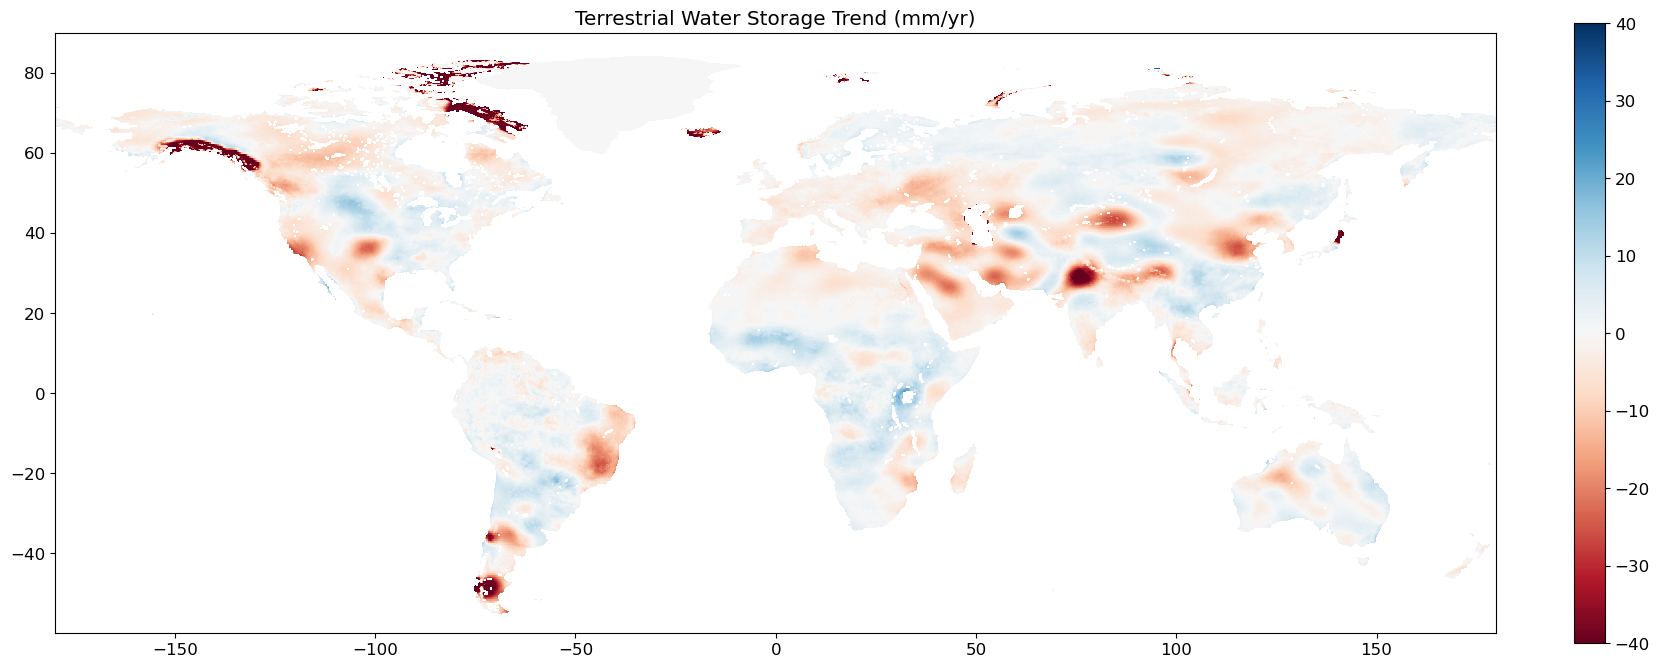

In [22]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
#!pip install xarray
import xarray as xr

font = {'size'   : 12}
matplotlib.rc('font', **font)

tws=xr.open_dataset('data/DATWS_STL_based_trend.nc')['TWS_Trend']
mask=np.isnan(tws)

tws=tws.where(tws>-500, 0).where(~mask.data)

fig, axs=plt.subplots(figsize=(20, 18))
im=plt.imshow(tws[::-1], cmap='RdBu', vmin=-40, vmax=40, extent=[-179.95, 179.95, -59.95, 89.95])
plt.colorbar(im, fraction=0.02)
plt.title('Terrestrial Water Storage Trend (mm/yr)')

## Agricultural practices led to the greening of the Earth

Meanwhile, data from our model simulations shown here and from other satellite observations indicate increasing greenness from vegetation over the Earth’s lands in recent decades, highlighting the influence of human land use in shaping these greening patterns. Cropland greening from increased use of fertilizer and irrigation and the expansion of croplands contribute the most to the net increase in leaf area index and gross primary production globally. Our reanalysis-based gross primary production data reveal strong increasing trends in parts of China and India’s croplands.

The notebook example below shows how to visualize the global reanalysis product in terms of the gross primary production trends.


Text(0.5, 1.0, 'Gross Primary Production Trend (gC/m2/yr)')

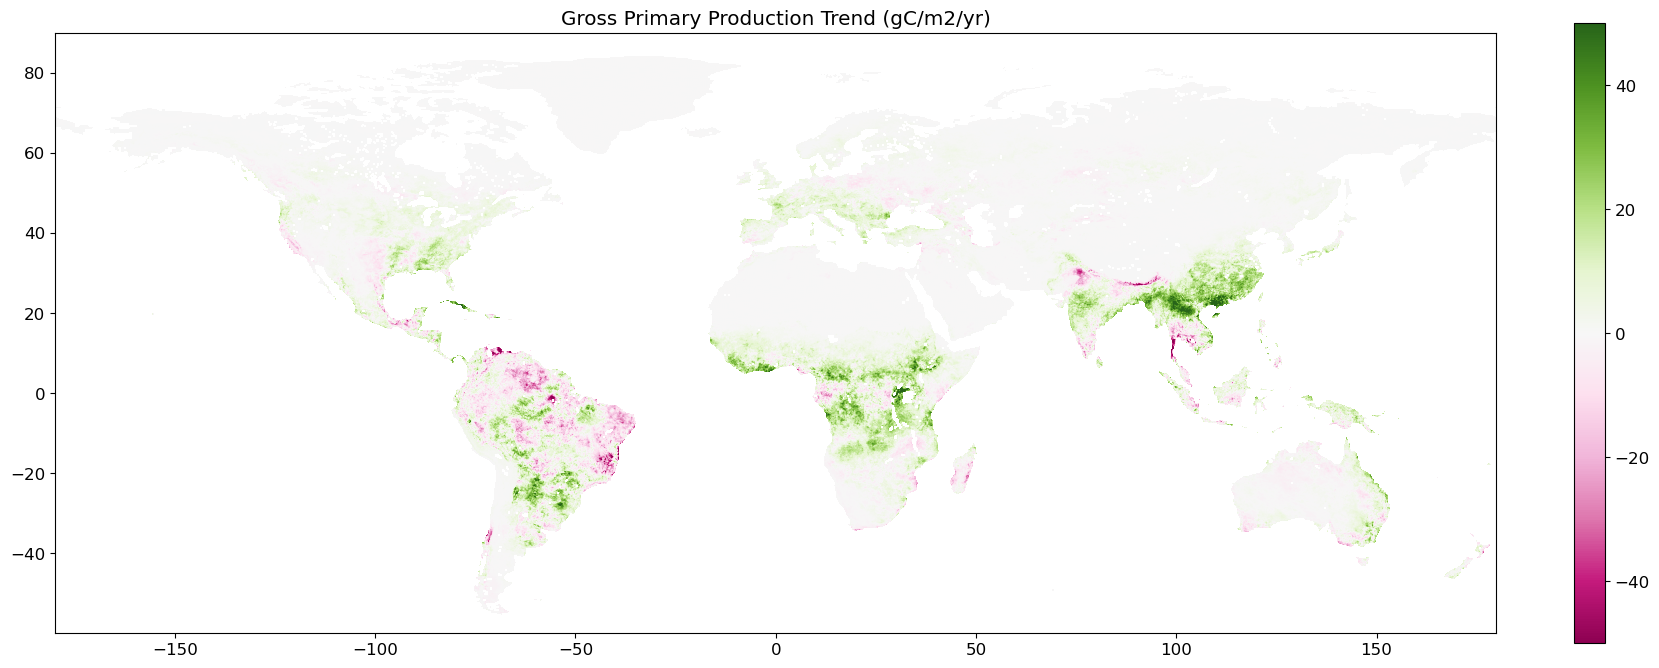

In [25]:
gpp=xr.open_dataset('data/DAGPP_STL_based_trend.nc')['GPP_Trend']
gpp=gpp.where(gpp>-500, 0).where(~mask.data)

fig, axs=plt.subplots(figsize=(20, 18))
im=plt.imshow(gpp[::-1], cmap='PiYG', vmin=-50, vmax=50, extent=[-179.95, 179.95, -59.95, 89.95])
plt.colorbar(im, fraction=0.02)
plt.title('Gross Primary Production Trend (gC/m2/yr)')

## The mutual impact on ET

To further look at the regional trends in terrestrial water storage and gross primary production and the changes in evapotranspiration in response, we can extract and calculate the regional annual averaged time series of such variables from the global renalaysis daily output. 

Taking South Asia as an example, the time series here shows the annual average anomalies for terrestrial water storage and evapotranspiration, as well as the annual total anomalies for gross primary production. The region has a TWS decrease at a rate of -3.6 mm/yr and GPP increase at a rate of 4.4 gC/m2/yr. The depletion of groundwater is reducing the interaction between the groundwater reservoir and deep layer soil moisture, leading to reduced deep soil evaporation. Enhanced vegetation growth may lead to increased transpiration. The TWS and GPP trends oppositely impact ET, resulting in ET with no significant long-term trend for these regions. Assimilating multi-source remote sensing products has constrained both freshwater changes and the human impact on water-vegetation interactions.

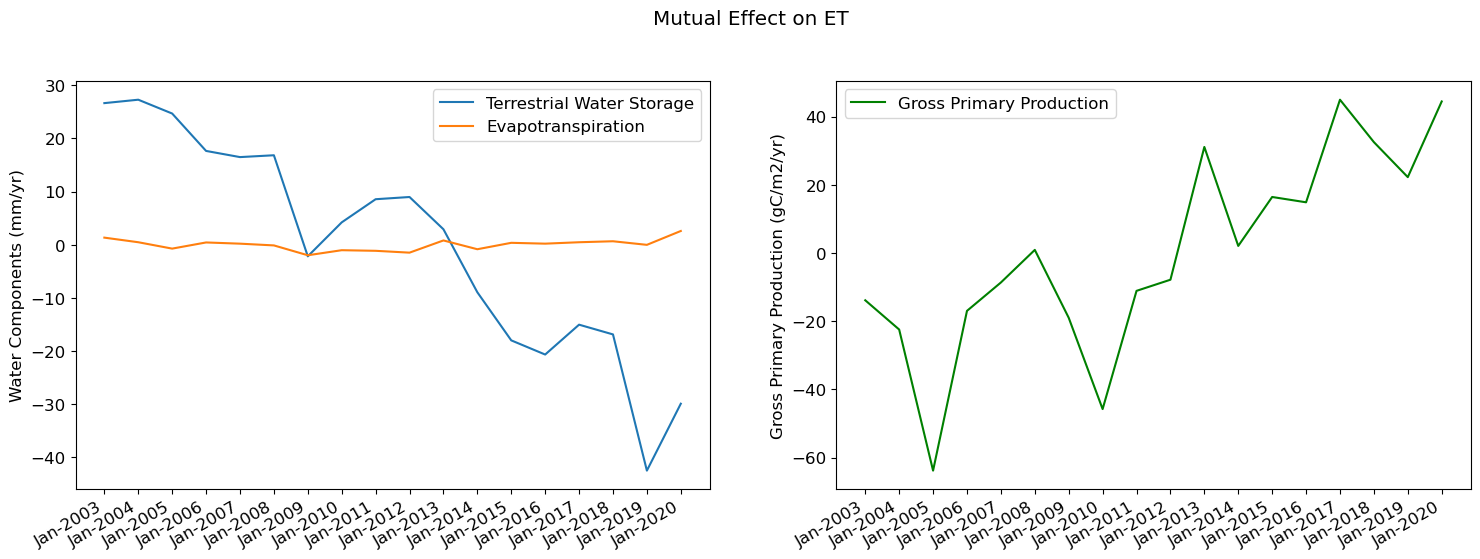

In [26]:
# read in the TWS, ET, and GPP time series data
Waterdata = pd.read_csv("data/SouthAsia_WaterComponents_annual_data.csv", usecols=["date", "WaterComponents(mm)"])
TWSts=Waterdata['WaterComponents(mm)'][0::2]
ETts=Waterdata['WaterComponents(mm)'][1::2]
GPPdata = pd.read_csv("data/SouthAsia_GPP_annual_data.csv", usecols=["date", "GPP(gC/m2/yr)"])


DFtws = pd.DataFrame()
DFet = pd.DataFrame()
DFgpp = pd.DataFrame()

DFtws['value'] = TWSts
DFet['value'] = ETts
DFgpp['value'] = GPPdata['GPP(gC/m2/yr)']

# Plot the time series of TWS and ET together since they are all water components with the same unit. Note that daily TWS and ET are converted to annual mean anomalies.
# plot the time series of GPP, note that daily GPP is converted to annual total anomaly.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
plt.suptitle('Mutual Effect on ET',y=1.0)
ax1.plot(DFtws.set_index(GPPdata['date']))
ax1.plot(DFet.set_index(GPPdata['date']))
ax1.set_ylabel('Water Components (mm/yr)')
ax1.legend(['Terrestrial Water Storage', 'Evapotranspiration'])
ax2.plot(DFgpp.set_index(GPPdata['date']),color="green")
ax2.set_ylabel('Gross Primary Production (gC/m2/yr)')
ax2.legend(['Gross Primary Production'])
plt.gcf().autofmt_xdate()
plt.show()